# 10 绘图实例(2) Drawing example(2)
本文主要讲述seaborn官网相关函数绘图实例。具体内容有：
1. Grouped violinplots with split violins(violinplot)
2. Annotated heatmaps(heatmap)
3. Hexbin plot with marginal distributions(jointplot)
4. Horizontal bar plots(barplot)
5. Horizontal boxplot with observations(boxplot)
6. Conditional means with observations(stripplot)
7. Joint kernel density estimate(jointplot)
8. Overlapping densities(ridge plot)
9. Faceted logistic regression(lmplot)
10. Plotting on a large number of facets(FacetGrid)

In [1]:
# import packages
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Grouped violinplots with split violins(violinplot)

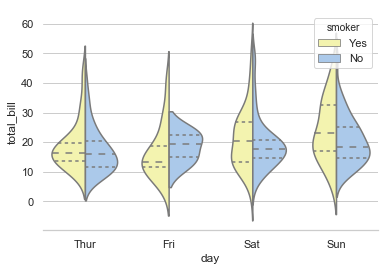

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison 画分组的小提琴图

sns.violinplot(x="day", y="total_bill", hue="smoker",
               # split表示当两种类别嵌套时分别用不同颜色表示
               # inner表示小提琴内部的数据点表示形式
               split=True, inner="quart",
               # 设定hue对应类别的颜色
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

## 2. Annotated heatmaps(heatmap)

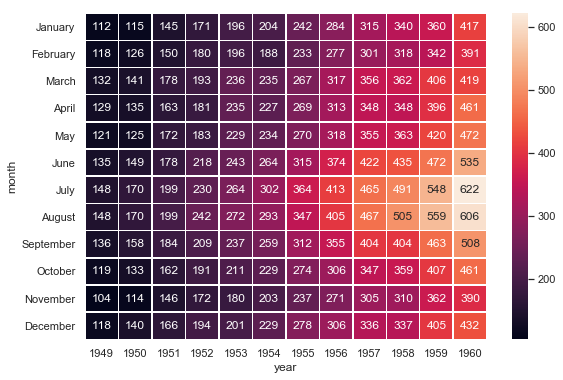

In [3]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
# 转成透视表后
flights = flights_long.pivot("month", "year", "passengers")
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
# annot表示每个方格内写入数据，fmt注释的形式，linewidth行宽度
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);

## 3. Hexbin plot with marginal distributions(jointplot)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


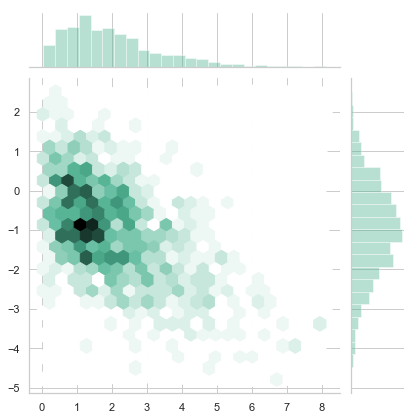

In [4]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
# 边界核密度估计图 kind选择类型
sns.jointplot(x, y, kind="hex", color="#4CB391");

## 4. Horizontal bar plots(barplot)

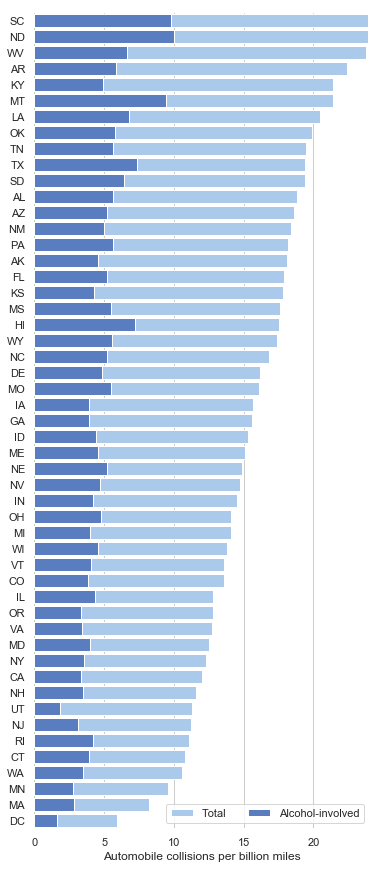

In [5]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure 设置图像大小
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset 获得数据集
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes 设置后续颜色色调
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
# 通过不同色调显示颜色
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
# 设置图例，frameon设置图例边框
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

## 5. Horizontal boxplot with observations(boxplot)

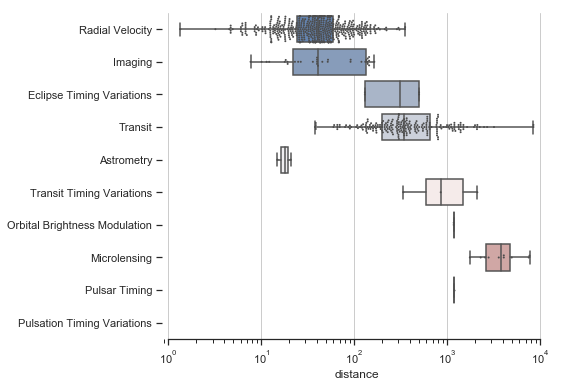

In [6]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# 设置x轴为log标尺
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes 画图
# whis设定异常值解决方法，range为延长上下边缘线条
sns.boxplot(x="distance", y="method", data=planets,
            whis="range", palette="vlag")

# Add in points to show each observation
# swarm添加散点
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## 6. Conditional means with observations(stripplot)

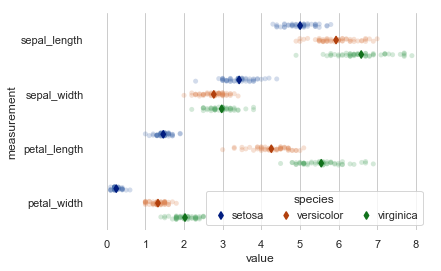

In [7]:
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation 提取species对应数据，以measurement命名
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
# 绘制分布散点图
sns.stripplot(x="value", y="measurement", hue="species",
              # dodge,jitter调整各点间距，防止重合
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
# 绘制点图
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)


# Improve the legend 自动获取图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True);


## 7. Joint kernel density estimate(jointplot)

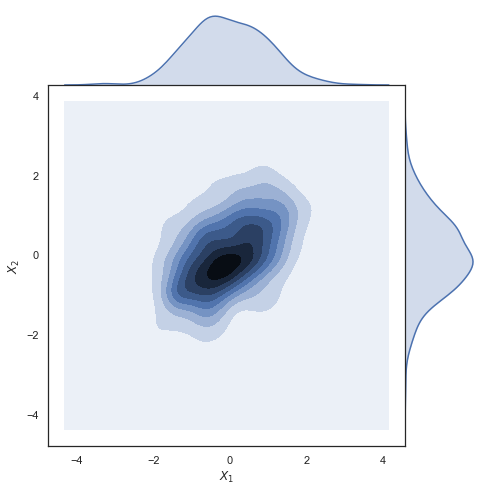

In [8]:
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

# Show the joint distribution using kernel density estimation 画出联合分布图
# space表示侧边图和中央图距离
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

## 8. Overlapping densities(ridge plot)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


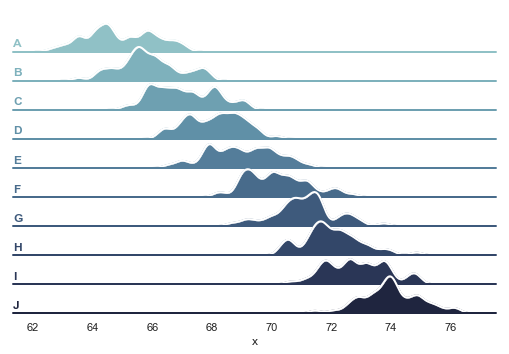

In [9]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data 创建数据
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
# 创建顺序调色板
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# row,col定义数据子集的变量，这些变量将在网格的不同方面绘制
# aspect纵横比
# height 每个图片的高度设定
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# 画出核密度图
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)

# 画出水平参考线
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap 移除边框
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## 9. Faceted logistic regression(lmplot)

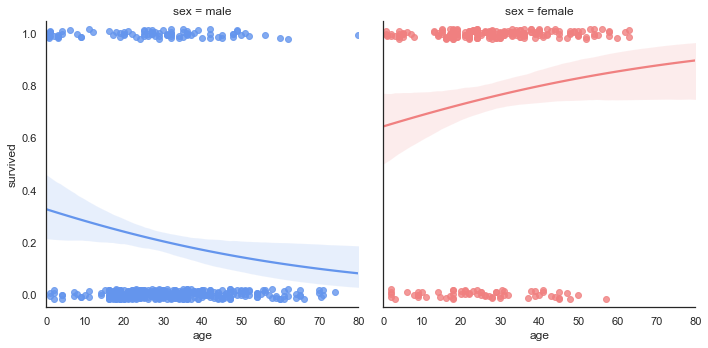

In [10]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors 设置颜色
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
# logistic设定画出逻辑回归模型
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True);
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

## 10. Plotting on a large number of facets(FacetGrid)

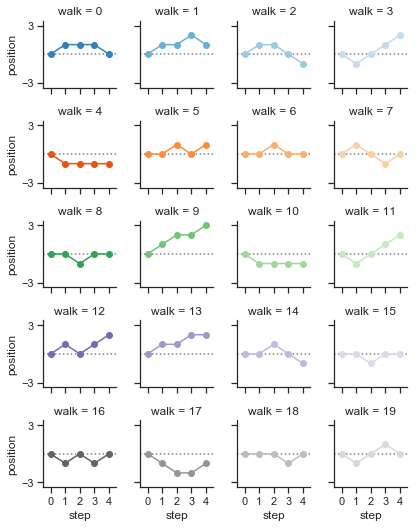

In [11]:
sns.set(style="ticks")

# Create a dataset with many short random walks 创建数据集
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk 初始化绘图坐标窗口
# col_wrap每一行四张图，col以walk进行分类
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point 画出线条图
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk 画图点图
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels  设定x,y坐标范围
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)